In [ ]:

command_str = '{sys.executable} -m pip install --upgrade statsmodels'.format(sys=sys)
print(command_str)
!{command_str}

In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

import scraping_utils
wikipedia = scraping_utils.wikipedia

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
#pandemic_df = s.load_object('pandemic_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

%pprint
dir()

D:\Documents\Repositories\notebooks\covid19\ipynb\Plot Cumulative Deaths and Confirms.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']
Pretty printing has been turned OFF


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'nx', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_ending_with', 'print_all_files_st

In [ ]:

!start %windir%\explorer.exe "{os.path.abspath(os.path.dirname(notebook_path))}"

In [3]:

for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        print("{} = s.load_object('{}')".format(df_name, df_name))
        print("{}".format(df_name))

all_countries_df = s.load_object('all_countries_df')
all_countries_df
arkansas_df = s.load_object('arkansas_df')
arkansas_df
california_df = s.load_object('california_df')
california_df
china_df = s.load_object('china_df')
china_df
colorado_df = s.load_object('colorado_df')
colorado_df
country_populations_df = s.load_object('country_populations_df')
country_populations_df
covid19_df = s.load_object('covid19_df')
covid19_df
czech_df = s.load_object('czech_df')
czech_df
district_of_columbia_df = s.load_object('district_of_columbia_df')
district_of_columbia_df
florida_df = s.load_object('florida_df')
florida_df
georgia_df = s.load_object('georgia_df')
georgia_df
germany_df = s.load_object('germany_df')
germany_df
hawaii_df = s.load_object('hawaii_df')
hawaii_df
hong_kong_df = s.load_object('hong_kong_df')
hong_kong_df
illinois_df = s.load_object('illinois_df')
illinois_df
indiana_df = s.load_object('indiana_df')
indiana_df
iowa_df = s.load_object('iowa_df')
iowa_df
iran_df = s.load_object

In [5]:

us_deaths_df = s.load_object('us_deaths_df')
us_deaths_df.columns.tolist()

['West_AK', 'West_AZ', 'West_CA', 'West_CO', 'West_HI', 'West_ID', 'West_MT', 'West_NM', 'West_NV', 'West_OR', 'West_UT', 'West_WA', 'West_WY', 'Midwest_IA', 'Midwest_IL', 'Midwest_IN', 'Midwest_KS', 'Midwest_MI', 'Midwest_MN', 'Midwest_MO', 'Midwest_ND', 'Midwest_NE', 'Midwest_OH', 'Midwest_OK', 'Midwest_SD', 'Midwest_WI', 'South_AL', 'South_AR', 'South_FL', 'South_GA', 'South_KY', 'South_LA', 'South_MS', 'South_NC', 'South_SC', 'South_TN', 'South_TX', 'South_VA', 'Northeast_CT', 'Northeast_DC', 'Northeast_DE', 'Northeast_MA', 'Northeast_MD', 'Northeast_ME', 'Northeast_NH', 'Northeast_NJ', 'Northeast_NY', 'Northeast_PA', 'Northeast_RI', 'Northeast_VT', 'Territories_GU', 'Territories_PR', 'Territories_VI', 'Deaths_New', 'Deaths_Cumulative']

In [7]:

columns_list = ['Deaths_New', 'Deaths_Cumulative']
us_deaths_df[columns_list]

,Deaths_New,Deaths_Cumulative
Date,,
2020-02-29,1,1
2020-03-01,1,2
2020-03-02,4,6
2020-03-03,3,9
2020-03-04,2,11
2020-03-06,3,14
2020-03-07,5,19
2020-03-08,2,21
2020-03-09,5,26


In [11]:

usa_df = s.load_object('usa_df')
usa_df.set_index('Date', drop=True, inplace=True)
usa_df.columns.tolist()

['West_AK', 'West_AZ', 'West_CA', 'West_CO', 'West_HI', 'West_ID', 'West_MT', 'West_NM', 'West_NV', 'West_OR', 'West_UT', 'West_WA', 'West_WY', 'Midwest_IA', 'Midwest_IL', 'Midwest_IN', 'Midwest_KS', 'Midwest_MI', 'Midwest_MN', 'Midwest_MO', 'Midwest_ND', 'Midwest_NE', 'Midwest_OH', 'Midwest_OK', 'Midwest_SD', 'Midwest_WI', 'South_AL', 'South_AR', 'South_FL', 'South_GA', 'South_KY', 'South_LA', 'South_MS', 'South_NC', 'South_SC', 'South_TN', 'South_TX', 'South_VA', 'South_WV', 'Northeast_CT', 'Northeast_DC', 'Northeast_DE', 'Northeast_MA', 'Northeast_MD', 'Northeast_ME', 'Northeast_NH', 'Northeast_NJ', 'Northeast_NY', 'Northeast_PA', 'Northeast_RI', 'Northeast_VT', 'Territories_GU', 'Territories_PR', 'Territories_VI', 'Confirmed_New', 'Confirmed_Cumulative', 'Deaths_New', 'Deaths_Cumulative', 'Recovered_New', 'Recovered_Cumulative']

In [12]:

usa_df.Deaths_Cumulative = usa_df.Deaths_Cumulative.fillna(0)
usa_df.Deaths_Cumulative = usa_df.Deaths_Cumulative.map(lambda x: int(x))
usa_df.Deaths_New = usa_df.Deaths_New.fillna(0)
usa_df.Deaths_New = usa_df.Deaths_New.map(lambda x: int(x))
columns_list = ['Confirmed_New', 'Confirmed_Cumulative', 'Deaths_New', 'Deaths_Cumulative']
usa_df[columns_list]

,Confirmed_New,Confirmed_Cumulative,Deaths_New,Deaths_Cumulative
Date,,,,
2020-01-21,1,1,0,0
2020-01-24,1,2,0,0
2020-01-25,1,3,0,0
2020-01-26,2,5,0,0
2020-01-30,1,6,0,0
2020-01-31,1,7,0,0
2020-02-01,1,8,0,0
2020-02-02,3,11,0,0
2020-02-05,1,12,0,0


In [ ]:

usa_df.set_index('Date', drop=True, inplace=True)

In [35]:

def show_dual_plots(column_type='Cumulative'):
    columns_list = ['Confirmed_{}'.format(column_type),
                    'Deaths_{}'.format(column_type)]
    fig, ax = plt.subplots(figsize=(18, 7))
    ax.set_yscale('log')
    AxesSubplot_obj = usa_df[columns_list].plot.line(ax=ax)
    Line2D_obj_list = [Line2D_obj for Line2D_obj in AxesSubplot_obj.get_lines()]
    for cn, Line2D_obj in zip(columns_list, Line2D_obj_list):
        cn_series = usa_df[cn]
        cn_series.dropna(inplace=True)
        x = cn_series.index[-1]
        y = cn_series.iloc[-1]
        color = Line2D_obj.get_color()
        annotation = plt.annotate(cn, xy=(x, y), color=color)
        Line2D_obj.set_alpha(alpha=1.0)

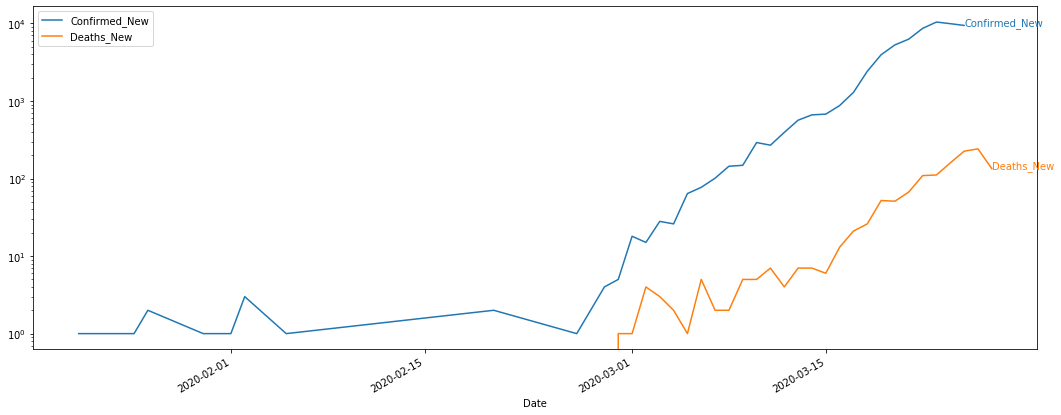

In [37]:

show_dual_plots(column_type='New')

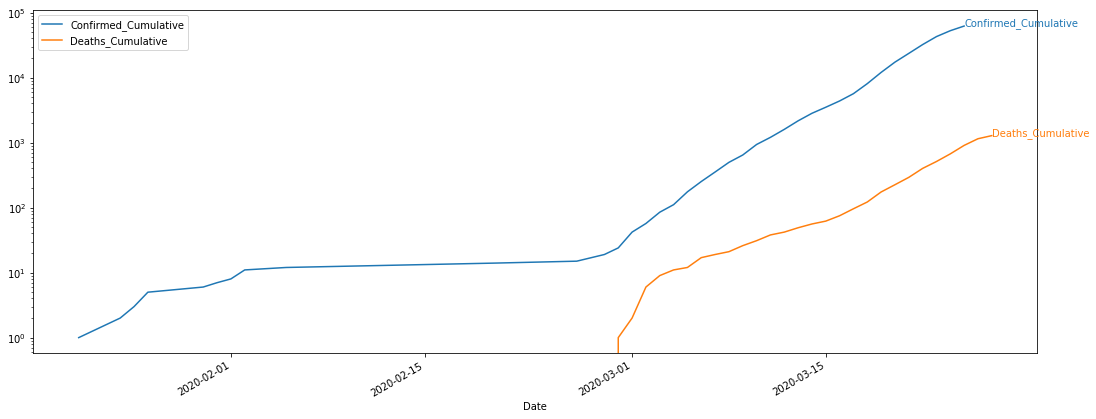

In [38]:

show_dual_plots(column_type='Cumulative')

In [39]:

usa_df.Deaths_New.idxmax()

Timestamp('2020-03-26 00:00:00')


---
# DataFrame Creation

In [15]:

mask_series = (usa_df.index == pd.Timestamp('2020-03-25 00:00:00'))
usa_df.loc[mask_series, 'Deaths_New']

Date
2020-03-25    0
Name: Deaths_New, dtype: int64

In [18]:

mask_series = (us_deaths_df.index == pd.Timestamp('2020-03-25 00:00:00'))
new_value = us_deaths_df.loc[mask_series, 'Deaths_New']
mask_series = (usa_df.index == pd.Timestamp('2020-03-25 00:00:00'))
usa_df.loc[mask_series, 'Deaths_New'] = new_value

In [19]:

mask_series = (us_deaths_df.index == pd.Timestamp('2020-03-25 00:00:00'))
new_value = us_deaths_df.loc[mask_series, 'Deaths_Cumulative']
mask_series = (usa_df.index == pd.Timestamp('2020-03-25 00:00:00'))
usa_df.loc[mask_series, 'Deaths_Cumulative'] = new_value

In [30]:

columns_list = list(set(us_deaths_df.columns).intersection(set(usa_df.columns)))
usa_df = usa_df.merge(us_deaths_df, how='outer', on=columns_list, left_index=True,
                      right_index=True).reset_index(inplace=False)
columns_list = ['Date', 'Confirmed_New', 'Confirmed_Cumulative', 'Deaths_New', 'Deaths_Cumulative']
usa_df[columns_list]

,Date,Confirmed_New,Confirmed_Cumulative,Deaths_New,Deaths_Cumulative
0,2020-01-21,1.0,1.0,0,0
1,2020-01-24,1.0,2.0,0,0
2,2020-01-25,1.0,3.0,0,0
3,2020-01-26,2.0,5.0,0,0
4,2020-01-30,1.0,6.0,0,0
5,2020-01-31,1.0,7.0,0,0
6,2020-02-01,1.0,8.0,0,0
7,2020-02-02,3.0,11.0,0,0
8,2020-02-05,1.0,12.0,0,0
9,2020-02-20,2.0,14.0,0,0


In [31]:

s.store_objects(usa_df=usa_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\usa_df.pickle
